# Случайные процессы. Практическое задание 5

* Дедлайн **13 ноября 23:59** (13 дней на выполнение).
* Внимательно прочтите правила оформления. Задания, оформленные не по правилам, могут быть проигнорированы.
* В коде могут встречаться пропуски, которые обычно обозначаются так: <пояснение>
* Условие задания полностью серьезное. Шуток нет.

--------------

Для выполнения задания потребуются следующие библиотеки: bs4, urllib, networkx. Следующими командами можно их поставить (Ubuntu):

sudo pip3 install beautifulsoup4

sudo pip3 install urllib2

sudo pip3 install networkx

В случае возникновения проблем пишите на почту.

--------------

## PageRank

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний: V
* Начальное распределение: $\Pi_0 = \left( \frac{1}{|V|} \dots  \frac{1}{|V|} \right)$
* Переходные вероятности: $p_{ij} = \frac{1 - p}{deg_{v_i}} I\left((i,j) \in E\right) + \frac{p}{N}$,
если $deg_{v_i} \neq 0$ , и $p_{ij} = \frac{1}{N}$ иначе. 

#### Вычисление

Данная марковская цепь является эргодической. Почему?

#### <Ответ>
Потому что выполнено условие эргодической теоремы, а именно множество вершин конечно и $P$ не содержит 0, т.к. в любую вершину можно попасть с вероятностью хотя бы $\frac{p}{N}$, где $N$ - мощность множества $V$


А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left|\left|\Pi^{(k)} - \Pi^{(k - 1)}\right|\right| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

####  <Ответ>
Нет, не имеет, т.к. в пределе получится одна и та же матрица $\Pi$ вне зависимости от начального распределения.

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

#### <Ответ> 
Так как скорость сходимости экспонениальная, то лучше потратить пердоставленную вычислительную мощность на увеличение точности вычисления при одном начальном состоянии, чем на вычисление для различных начальных состояний но с меньшей точностью.

Какая верхняя оценка на скорость сходимости?

#### <Ответ>
$\left|\left|\Pi^{(n)} - \Pi\right|\right| \leq (1 - \varepsilon)^{\frac{n}{n_0}}$ , где $\varepsilon = \min p_{i,j} < 1$, $n_0 = 1$ т.е. сходимость экспоненциальная.


За ответы можно получить **1 балл**.

## Часть 1

За выполнение этой части можно получить **2 балла** за автоматическую проверку и **2 балла** за все остальное.

In [1]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt

%matplotlib inline

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

[[ 0.  0.  0.]
 [ 2.  2.  2.]]


In [2]:
def create_page_rank_markov_chain(v_size,links, damping_factor=0.15):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links)
#     N = links.max() + 1  # Число веб-страниц
    N = v_size
    deg = np.zeros(N,dtype=int) # степени вершин
    for p in links:
        deg[p[0]] += 1
        
    prob_matrix = np.zeros([N,N])
    for p in links:
        prob_matrix[p[0]][p[1]] += (1-damping_factor)/deg[p[0]]
    
    for i in range(N):
        for j in range(N):
            if deg[i] != 0:
                prob_matrix[i][j] += damping_factor/N
            else :
                prob_matrix[i][j] += 1.0/N
    
    return np.matrix(prob_matrix)


def page_rank(v_size, links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    
    prob_matrix = create_page_rank_markov_chain(v_size,links, 
                                                damping_factor=damping_factor)
    distribution = np.matrix(start_distribution)
    trace = []
    if return_trace:
        trace.append(distribution)
    while True :
        distribution2 = distribution * prob_matrix
        if return_trace :
            trace.append(distribution2)
        
        delta = np.abs(distribution2 - distribution)
        eps = np.max(delta)
        if eps < tolerance:
            break
            
        distribution = distribution2
    
    if return_trace:
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()

**Автоматическая проверка (2 балла) **

Реализацию функций create_page_rank_markov_chain и page_rank скопируйте в файл с названием v[номер варианта].py и вышлите на почту. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [62]:
def random_graph(n, p):
    return [(i//n,i%n) for i in range(n**2) if bernoulli.rvs(size=1,p=p)[0] == 1]

Теперь сгенерируем случайный граф и нарисуем его.

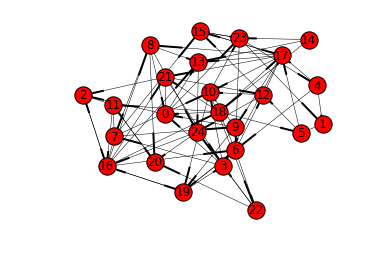

In [64]:
N, p = 25, 0.15
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
G.add_nodes_from(np.arange(N))
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

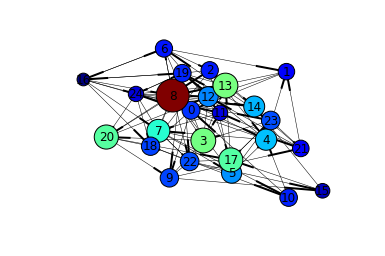

In [62]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(N, edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

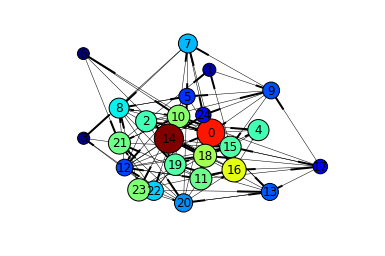

In [17]:
import v57
pr_distribution = v57.page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

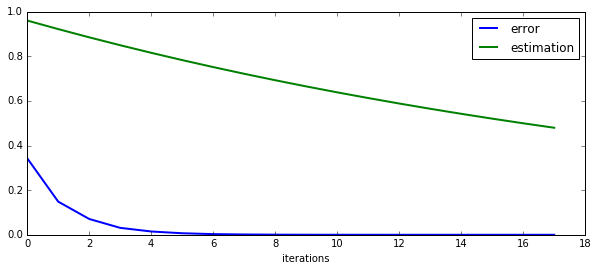

In [18]:
pr_distribution, pr_trace = page_rank(N,edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, [(1 - 1/N)**k for k in range(1,len(x)+1)], 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

#### <Выводы>
Оценка работает достаточно грубо.


Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

Будем строить графики зависимости числа итераций $k$ до сходимости от $n$ и $p$

##### 1: k(n)
Для различных значений $p$


In [118]:
def build_plot_k_n(p):
    n = np.arange(3,80)
    n_iterations = []
    for N in n:
        start_distribution = np.ones((1, N)) / N
        edges = random_graph(N, p)
        pr_distribution, pr_trace = page_rank(N,edges, start_distribution, return_trace=True)
        n_iterations.append(len(pr_trace))
    plt.figure(figsize=(15,5))
    plt.grid(True)
    plt.title('k(n), p =' + str(p))
    plt.xlabel('n')
    plt.ylabel('k')
    plt.plot(n,n_iterations)
    plt.show()

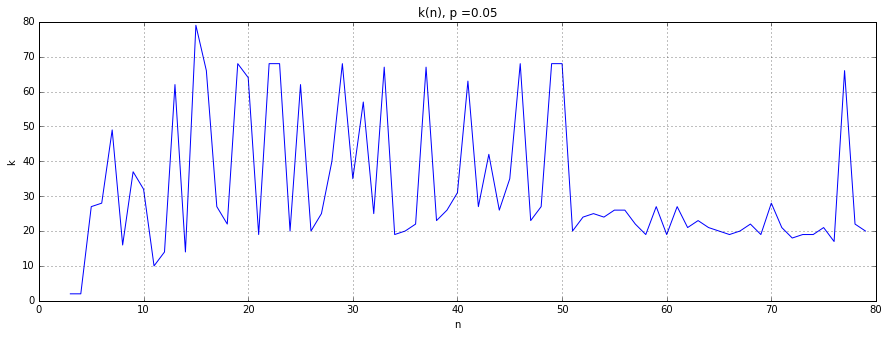

In [119]:
build_plot_k_n(0.05)

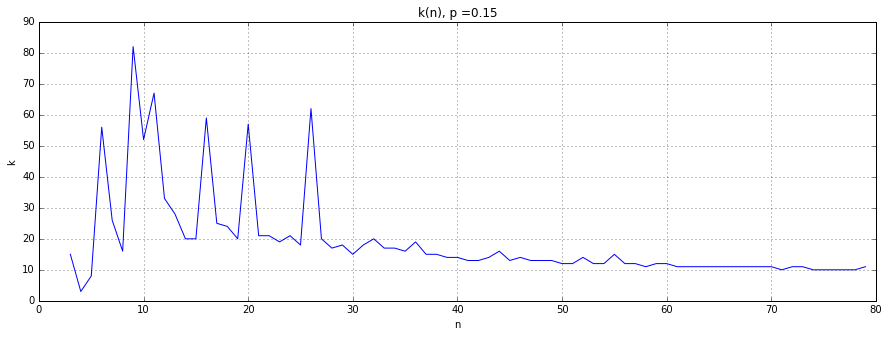

In [108]:
build_plot_k_n(0.15)

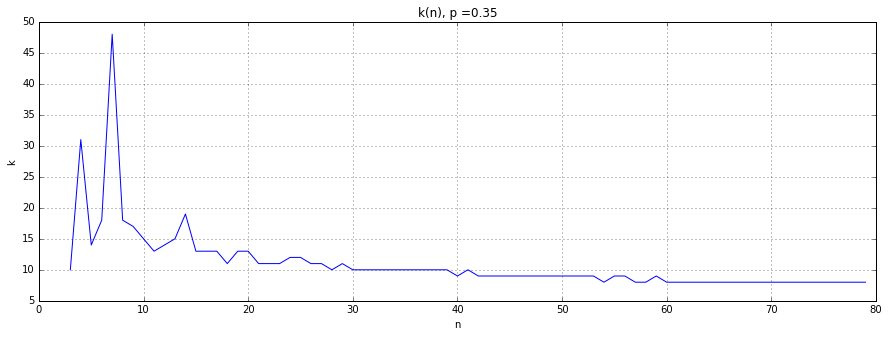

In [120]:
build_plot_k_n(0.35)

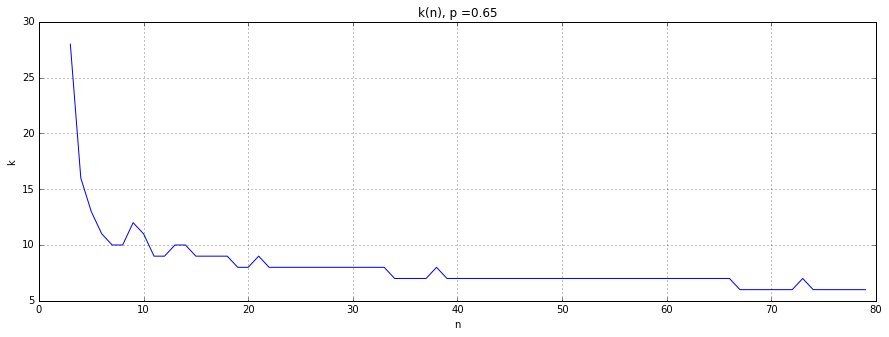

In [111]:
build_plot_k_n(0.65)

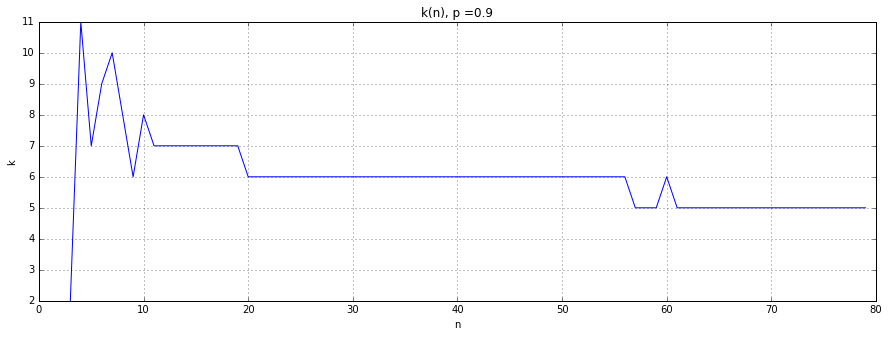

In [122]:
build_plot_k_n(0.90)

In [23]:
def build_plot_k_p(N):
    P = np.arange(0.01 , 0.95,0.01)
    n_iterations = []
    start_distribution = np.ones((1, N)) / N
    for p in P:
        edges = random_graph(N, p)
        pr_distribution, pr_trace = page_rank(N,edges, start_distribution, return_trace=True)
        n_iterations.append(len(pr_trace))
    plt.figure(figsize=(15,5))
    plt.grid(True)
    plt.plot(P,n_iterations)
    plt.plot([np.log(N)/N,np.log(N)/N],[np.min(n_iterations),np.max(n_iterations)],
             '--',color='red',label=r'$\frac{\ln n}{n}$')
    plt.xlabel("p")
    plt.ylabel("k")
    plt.legend(fontsize=20)
    plt.show()

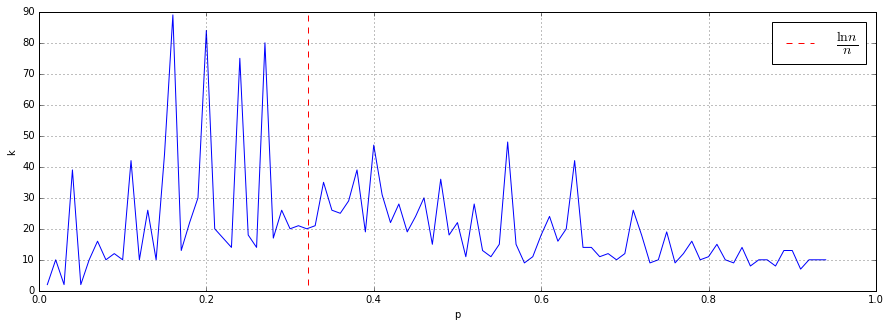

In [24]:
build_plot_k_p(5)

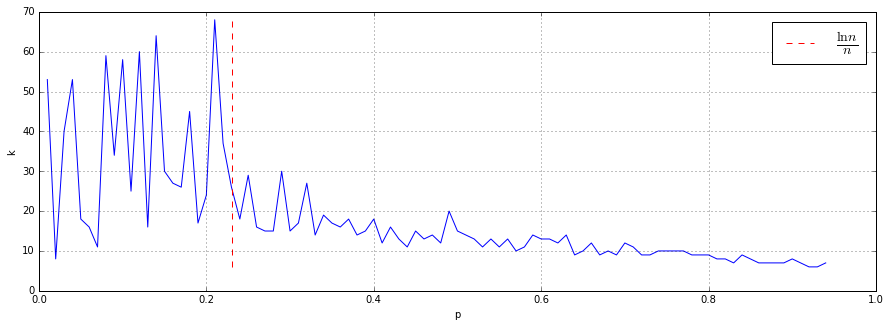

In [25]:
build_plot_k_p(10)

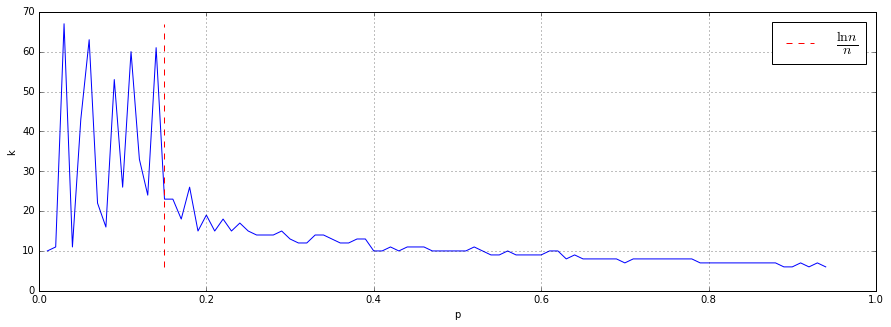

In [26]:
build_plot_k_p(20)

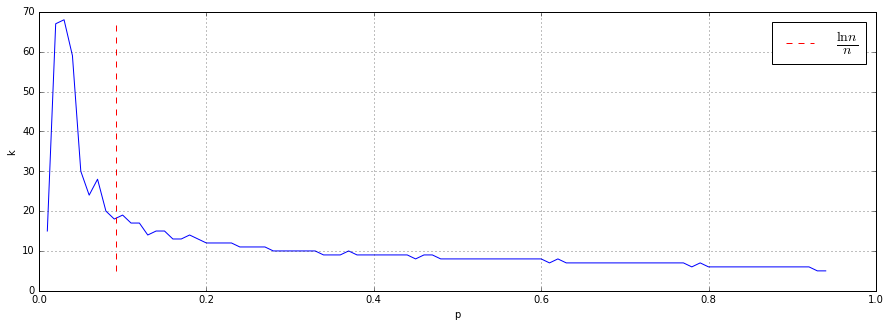

In [27]:
build_plot_k_p(40)

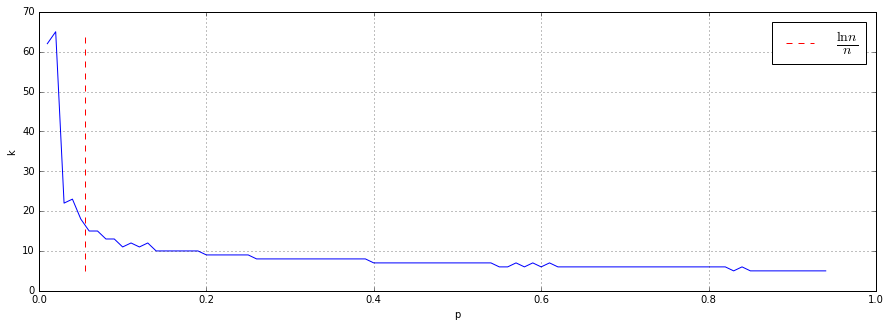

In [28]:
build_plot_k_p(80)

Как видно из графиков, при малых $p$ и $n$ количество итераций сильно разнится и ведет себя хаотически, при увеличении $p$ или $n$ эта величина уменьшается, стремясь к некоторой константе, разброс заметно уменьшается.

На каждом графике k(p) я провел уровень $x = \frac{\ln n}{n}$, для больших $n$ при $p > x$ граф скорее всего будет слабо связен. При $p < x$ граф скорее всего будет не связен. Видим , что при больших $n$ этот уровень хорошо показывает переход от хаотического поведения скорости сходимости к стабильному. Можно предположить, что связность графа является важным условием для быстрой сходимости.

Этот вывод можно попробовать сделать и из верхней оценки сходимости, т.к. там участвует зачение $\min p_{ij}$, которое в несвязном графе будет принимать малое значние $1/N$ и, возможно, ухудшать сходимость.

## Часть 2

За выполнение этой части можно получить **5 баллов** и больше. В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [3]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [7]:
def get_links_from_site(url, N=10):
    links = []
    site = get_site(url)
    urls = []
    urls.append(url)
    for i in range(N):
        try:
            # Загружаем страницу по урлу и извлекаем из него все ссылки
            # Не выставляйте sleep_time слишком маленьким, 
            # а то еще забанят где-нибудь
            links_from_url = load_links(urls[i], sleep_time=0.01)
            # Если мы хотим переходить по ссылкам только определенного сайта
            links_from_url = list(filter(lambda x: get_site(x) == site, 
                                         links_from_url))

            # Добавляем соответствующие вершины и ребра в веб-граф
            for j in range(len(links_from_url)):
                # Такая ссылка уже есть
                if links_from_url[j] in urls:
                    links.append((i, urls.index(links_from_url[j])))

                # Новая ссылка
                else:
                    if len(urls) >= N:
                        continue
                    links.append((i, len(urls)))
                    urls.append(links_from_url[j])

        except:
            pass  # Не загрузилась с 5 попытки, ну и ладно
    return links,urls

In [86]:
def build_graph_from_links(links,N=-1,width=0.02):
    if N < 0:
        N = np.max(links) + 1
    start_distribution = np.ones((1, N)) / N
    pr_distribution = page_rank(N, links, start_distribution)
    size_const = 10 ** 4
    G = networkx.DiGraph()
    G.add_edges_from(links)
    G.add_nodes_from(np.arange(N))
    plt.figure(figsize=(13,13))
    plt.axis('off')
    networkx.draw_networkx(G,with_labels=False,width=width, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

In [70]:
N = 10
links,urls = get_links_from_site('http://wikipedia.org/wiki/',N)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 8), (0, 7), (3, 1), (3, 2), (3, 7), (3, 8), (3, 7), (3, 4), (3, 4), (3, 3), (3, 3), (4, 1), (4, 2), (4, 3), (4, 4), (4, 4), (5, 1), (5, 2), (5, 3), (5, 3), (5, 3), (5, 5), (5, 5), (6, 1), (6, 2), (6, 5), (6, 6), (6, 6), (7, 1), (7, 2), (7, 7), (8, 1), (8, 2), (8, 8), (8, 8), (9, 1), (9, 2), (9, 9), (9, 9)]
['http://wikipedia.org/wiki/', 'http://wikipedia.org#mw-head', 'http://wikipedia.org#p-search', 'http://wikipedia.org/wiki/Wikipedia', 'http://wikipedia.org/wiki/Free_content', 'http://wikipedia.org/wiki/Encyclopedia', 'http://wikipedia.org/wiki/Wikipedia:Introduction', 'http://wikipedia.org/wiki/Special:Statistics', 'http://wikipedia.org/wiki/English_language', 'http://wikipedia.org/wiki/Portal:Arts']


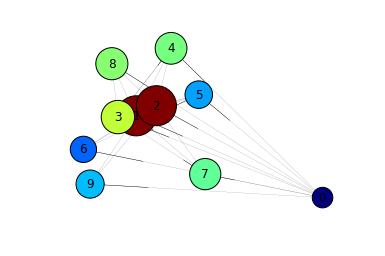

In [71]:
print(links)
print(urls)
build_graph_from_links(links)

100 страниц с википедии:

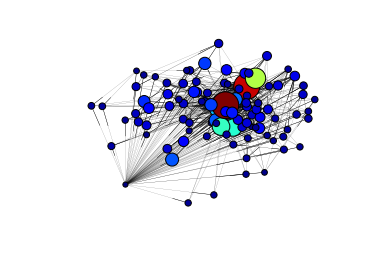

In [82]:
N = 100
links,urls = get_links_from_site('http://wikipedia.org/wiki/',N)
build_graph_from_links(links)

1000 страниц с википедии:

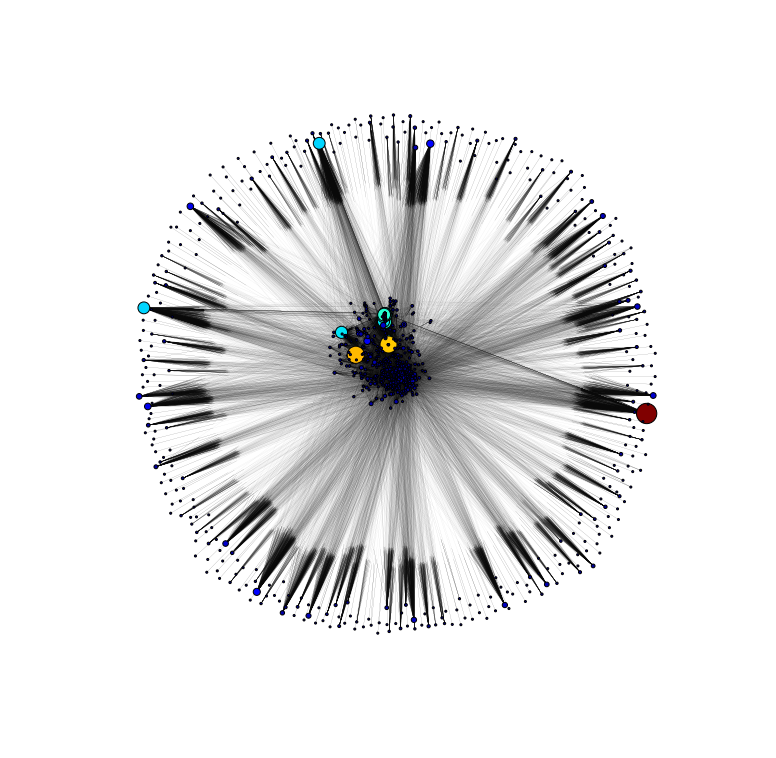

In [17]:
N = 1000
# links,urls = get_links_from_site('http://wikipedia.org/wiki/',N)
build_graph_from_links(links)

 Основное исследование проведу для сайта http://ru.discrete-mathematics.org

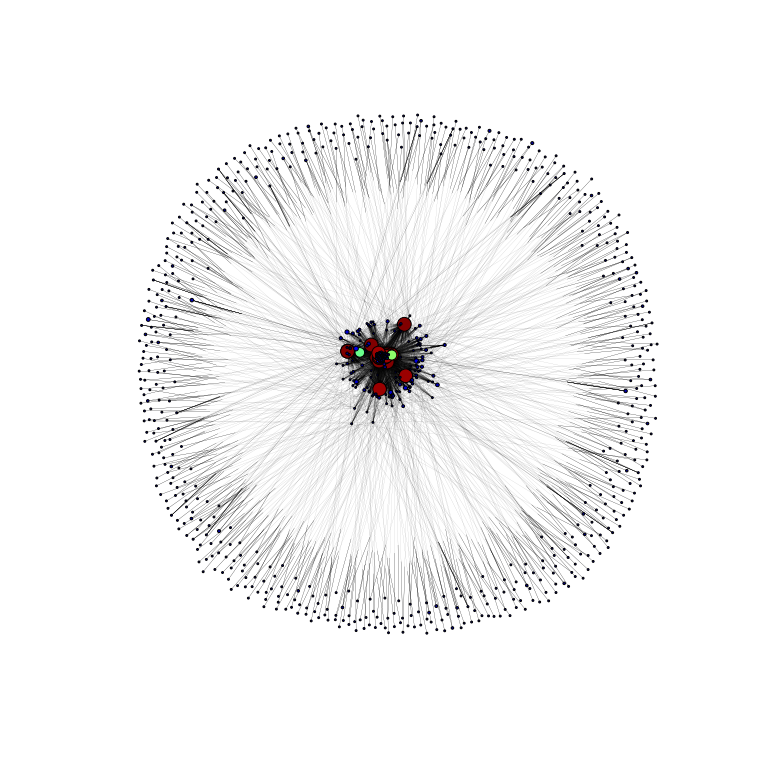

In [14]:
N = 1000
# links_discr,urls_discr = get_links_from_site('http://ru.discrete-mathematics.org',N)
build_graph_from_links(links_discr)

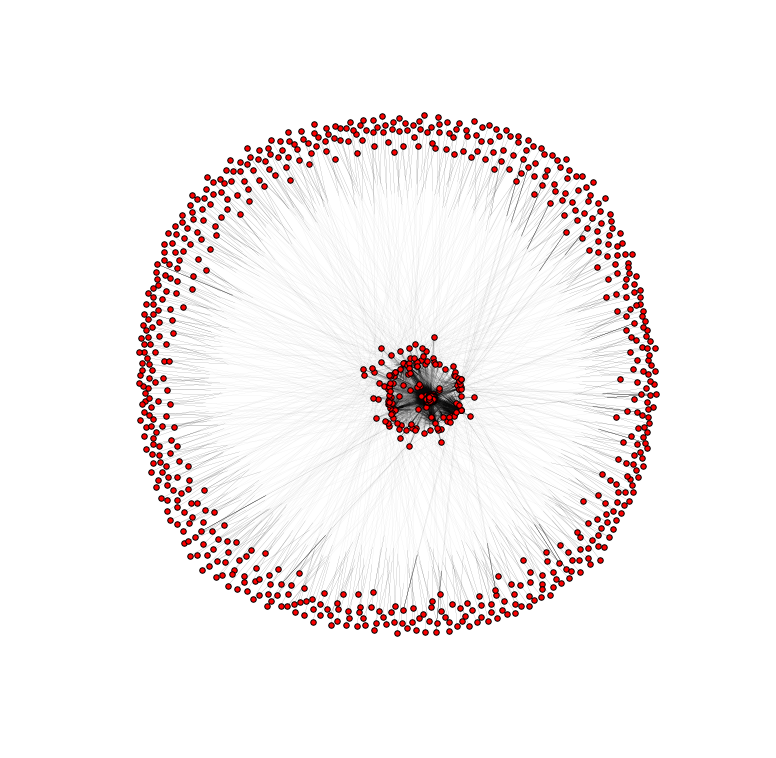

In [22]:
G = networkx.DiGraph()
G.add_edges_from(links_discr)
G.add_nodes_from(np.arange(N))
plt.figure(figsize=(13,13))
plt.axis('off')
networkx.draw_networkx(G,with_labels=False,width=0.02, node_size=3*1e1)

In [24]:
start_distribution = np.ones((1, N)) / N
pr_distribution,pr_trace = page_rank(N, links_discr, start_distribution,return_trace=True)

In [60]:
print('число итераций до сходимости = ' + str(len(pr_trace)))

число итераций до сходимости = 19


посмотрим на скорость сходимости для случайного графа с $N=1000$

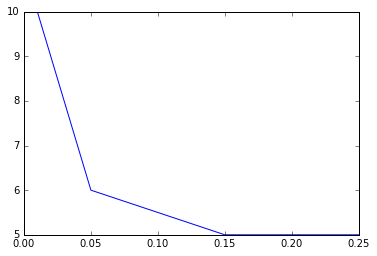

In [64]:
N, P = 1000, [0.01,0.05,0.15,0.25]
start_distribution = np.ones((1, N)) / N
trace_size = []
for p in P:
    edges = random_graph(N, p)
    pr_distribution_r,pr_trace_r = page_rank(N, edges, start_distribution,return_trace=True)
    trace_size.append(len(pr_trace_r))
plt.plot(P,trace_size)


In [65]:
print(np.mean(trace_size))

6.5


Скорость сходимости веб-графа сильно ниже чем для случайного графа, при проверенных значениях $p$, так как граф получается разреженным.

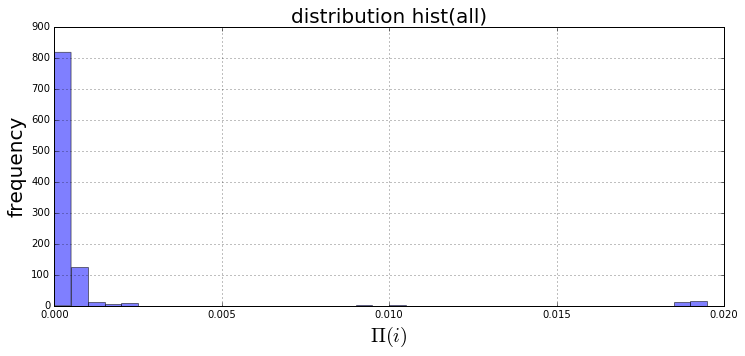

In [58]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.title('distribution hist(all)',fontsize=20)
plt.xlabel(r'$\Pi(i)$',fontsize=20)
plt.ylabel('frequency',fontsize=20)

quant,bins,patches = plt.hist(pr_distribution,
                              bins=np.arange(0,0.02,0.0005),
                              facecolor='b', alpha=0.5)

0.0190985828992


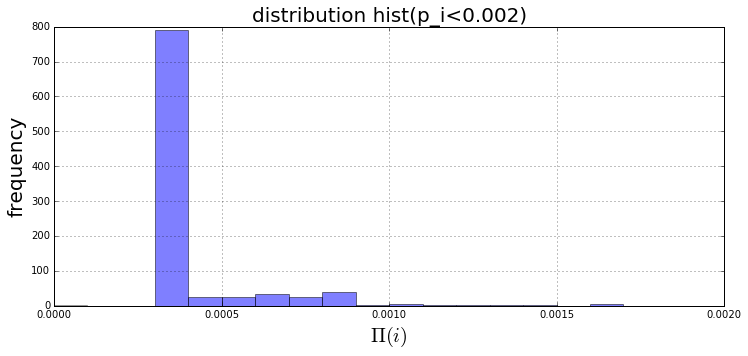

In [57]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.title('distribution hist(p_i<0.002)',fontsize=20)
plt.xlabel(r'$\Pi(i)$',fontsize=20)
plt.ylabel('frequency',fontsize=20)

quant,bins,patches = plt.hist(pr_distribution,
                              bins=np.arange(0,0.002,0.0001),
                              facecolor='b', alpha=0.5)
print(np.max(pr_distribution))
plt.show()

Основную часть сайта составляют ссылки с низким рейтингом. 
Также имеется некоторое колиичество ссылок с высоким рейтингом, зметно отличающегося от рейтинга основной массы.
Исследуем такие ссылки:

In [83]:
sx = sorted(pr_distribution)
bound_value = sx[-20]
bound_value

0.018621738177259532

In [84]:
top_urls = []
top_indices = []
map_indices = dict()
k = 0
for i in range(N):
    if pr_distribution[i] >= bound_value:
        top_urls.append(urls_discr[i])
        top_indices.append(i)
        map_indices[i] = k
        k += 1
top_urls

['http://ru.discrete-mathematics.org/',
 'http://ru.discrete-mathematics.org#content',
 'http://ru.discrete-mathematics.org/?page_id=41',
 'http://ru.discrete-mathematics.org/?page_id=27',
 'http://ru.discrete-mathematics.org/?page_id=1414',
 'http://ru.discrete-mathematics.org/?page_id=599',
 'http://ru.discrete-mathematics.org/?page_id=9',
 'http://ru.discrete-mathematics.org/?page_id=2',
 'http://ru.discrete-mathematics.org/?page_id=624',
 'http://ru.discrete-mathematics.org/?page_id=5',
 'http://ru.discrete-mathematics.org/?page_id=252',
 'http://ru.discrete-mathematics.org/?page_id=394',
 'http://ru.discrete-mathematics.org/?page_id=449',
 'http://ru.discrete-mathematics.org/?page_id=699',
 'http://ru.discrete-mathematics.org/?page_id=625',
 'http://ru.discrete-mathematics.org/?page_id=626',
 'http://ru.discrete-mathematics.org/?page_id=3346',
 'http://ru.discrete-mathematics.org/?page_id=326',
 'http://ru.discrete-mathematics.org/?page_id=2909',
 'http://ru.discrete-mathematics.o

857


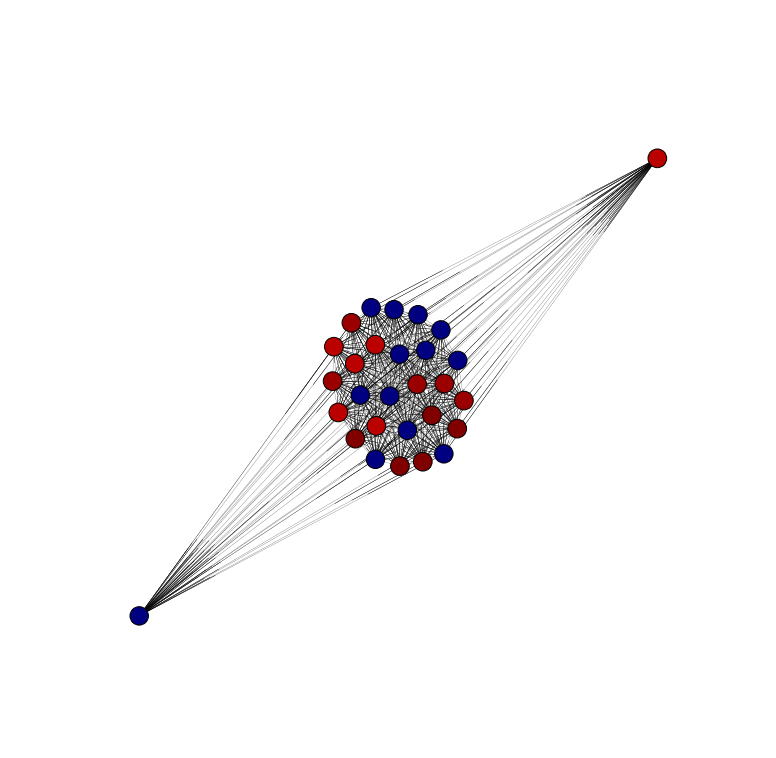

In [87]:
top_links = []
for link in links_discr:
    if link[0] in top_indices and link[1] in top_indices:
        new_link = (map_indices[link[0]],map_indices[link[1]])
        top_links.append(new_link)
print(len(top_links))
build_graph_from_links(top_links,N=len(top_urls),width=0.1)

Все все ссылки с высоким рейтингом ведут на главные страницы основных разделов или их подразделов. 
Например Новости, Сотрудники кафедры или Материалы -> Общефакультетские курсы.

На каждой такой странице есть ссылки на все остальные страницы разделов, поэтому полученный граф - клика (или почти клика)

Если не доводить до сходимости, то начальное распределение нужно поставить в соответствии с разумным представлением о популярности страниц. Основным страницам разделов дать самую большую вероятность, это будет соотвествовать естественному представлению о том, что пользователь первый раз попадает на главную страницу или на главную страницу одного из разделов(например часто посещаемого).

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000). Таким сайтом может быть, например, сайт <a href=http://ru.discrete-mathematics.org>кафедры Дискретной математики</a> (аккуратнее, если забанят, то лишитесь доступа к учебным материалам), <a href=http://yandexdataschool.ru>Школы анализа данных</a>, сайт магазина, больницы. Однако, советуем не выбирать сайты типа kremlin.ru, мало ли что.

Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

Для получения дополнительных баллов проведите аналогичные исследования для больших сайтов. Так же вы можете провести исследования, не ограничиваясь загрузкой только одного сайта.